El modelo de generación de ruido más común en las comunicaciones digitales que resulta en una observación de valores discretos es el canal simétrico binario (del ingles Binary Symmetric Channel o BSC). Este canal se aplica cuando el símbolo de datos de entrada es binario y las probabilidades condicionales se presentan como en la siguiente figura

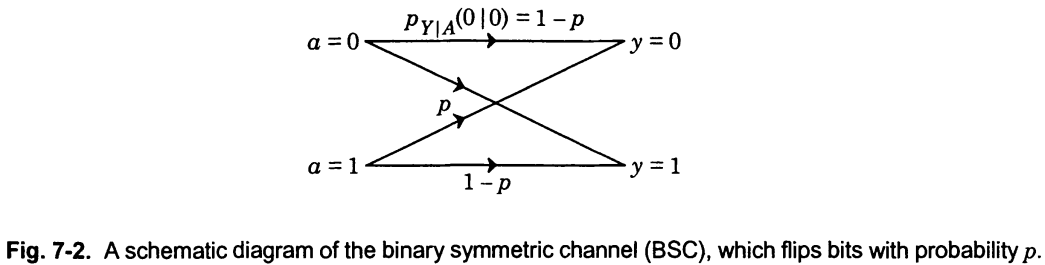

La observación ruidosa se diferencia del símbolo de entrada binaria con una probabilidad p, que se denomina probabilidad de error o probabilidad de cruce del BSC. 

Suponga que se transmite un símbolo binario  $A \in \{ 0,1 \}$   con probabilidades a priori  $P_A(0)=q$  y  $P_A(1) =1-q$  a través del BSC  descripto arriba. La observación   $Y \in \{ 0, 1 \}$  también es binaria e igual a A con probabilidad  1-p .

1. Encuentre cualitativamente la regla de decisión ML para el caso de  q= 0.6  y  p= 0.3 .
2. Encuentre cualitativamente la regla de decisión ML para el caso de  q= 0.5  y  p= 0.3 .
3. En cual de los casos (punto 1 o punto 2) esta regla de decisión es óptima? dicho en otras palabras, cuando esta regla de decisión produce la minima probabilidad de error?
4. Proponga un valor para p y q de forma tal que la regla de decisión ML sea óptima  y se esté en presencia de un canal que muy probablemente invierta el bit transmitido.
5. Realice y adjunte la simulación Monte Carlo del problema.

# Respuestas
---
1. Si q = 0.6, entonces $P_A(0) = 0.6$ y $P_A(1) = 0.4$.
2. Si q = 0.5, entonces $P_A(0) = 0.5$ y $P_A(1) = 0.5$.
     

+ $P_{Y/A}(0/0) = 1-p = 0.7$
+ $P_{Y/A}(1/0) = p = 0.3$
+ $P_{Y/A}(0/1) = p = 0.3$
+ $P_{Y/A}(1/1) = 1-p = 0.7$


<BarContainer object of 2 artists>

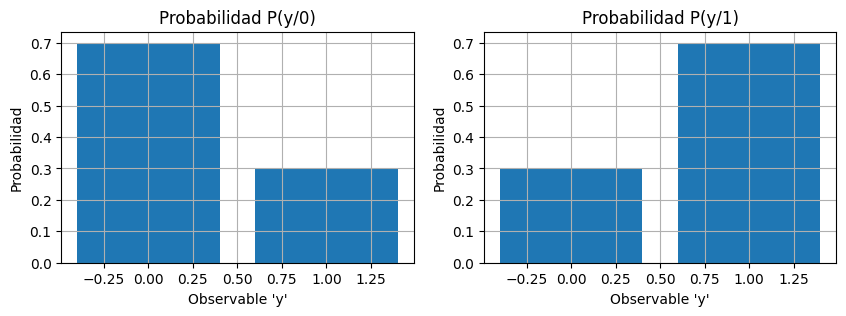

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,3))
yP1 = [0.7,0.3]
yP2 = [0.3,0.7]

plt.subplot(1,2,1)
plt.grid()
plt.ylabel("Probabilidad")
plt.xlabel("Observable 'y'")
plt.title("Probabilidad P(y/0)")
plt.bar([0,1],yP1)

plt.subplot(1,2,2)
plt.grid()
plt.ylabel("Probabilidad")
plt.xlabel("Observable 'y'")
plt.title("Probabilidad P(y/1)")
plt.bar([0,1],yP2)

Ahora, sobreponiendo ambos gráficos

<BarContainer object of 2 artists>

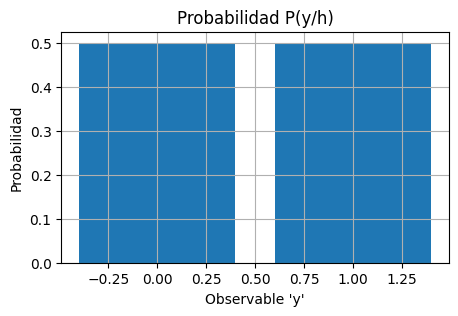

In [7]:
yPR = [(yP1[n]+yP2[n])/2 for n in range(len(yP1))]
plt.figure(figsize=(5,3))
plt.grid()
plt.ylabel("Probabilidad")
plt.xlabel("Observable 'y'")
plt.title("Probabilidad P(y/h)")
plt.bar([0,1],yPR)

1. Su nivel de decisión es 0.5.

2. Su nivel de decisión es 0.5.

3. Para el punto el punto 2. la regla de decisión ML es óptima, ya que $P_A(0) = P_A(1) =  0.5$

4. Si $q = 0.5$ la regla de decisión será óptima y si $p = 0.9$ el canal muy probablemente invierta el bit


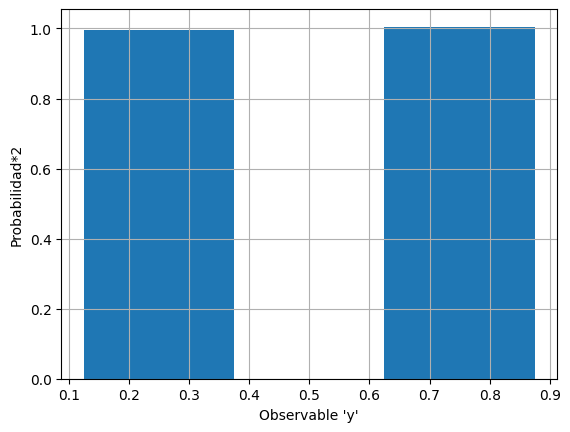

In [8]:
intentos = 10000
decision = 0.5
H = np.random.randint(0,2,intentos)
Y = [0 if(decision < H[n]) else 1 for n in range(len(H))]
plt.grid()
plt.ylabel("Probabilidad*2")
plt.xlabel("Observable 'y'")
plt.hist(Y,density=True,bins = 2,rwidth=0.5)
plt.show()

5. La simulación es similar para ambos casos de p, ya que q no cambia.\
q = 0.6

Probabilidad de error:  0.29696


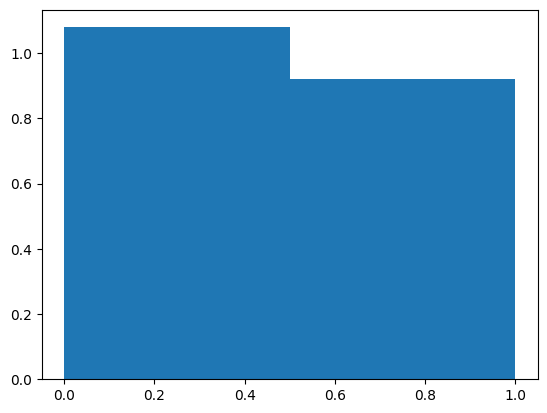

In [9]:
intentos = 50000
x = np.random.randint(1,101,intentos)
H = [1 if x[n] > 60 else 0 for n in range(len(x))]

def flip(numero,p = 30):
    if(np.random.randint(1,101) <= p):
        if(numero == 1):
            return 0
        else:
            return 1
    else:
        return numero
        

Y = [flip(H[n]) for n in range(len(H))]

plt.hist(Y,bins=2,density = True)

contador = 0
for n in range(len(Y)):
    if(Y[n] == H[n]):
        contador += 1

print("Probabilidad de error: ",1-(contador/intentos))


q = 0.5

Probabilidad de error:  0.30223999999999995


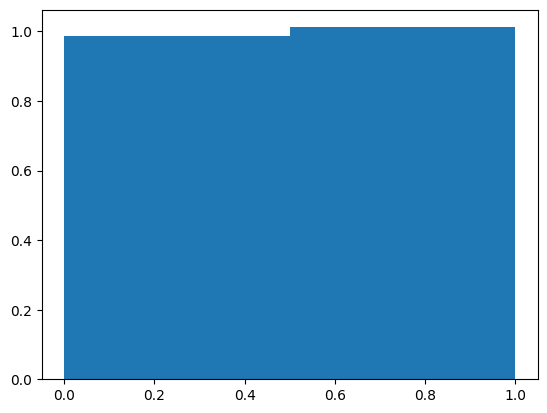

In [10]:
intentos = 50000
x = np.random.randint(1,101,intentos)
H = [1 if x[n] > 50 else 0 for n in range(len(x))]

Y = [flip(H[n]) for n in range(len(H))]

plt.hist(Y,bins=2,density = True)

contador = 0
for n in range(len(Y)):
    if(Y[n] == H[n]):
        contador += 1

print("Probabilidad de error: ",1-(contador/intentos))
